In [1]:
import bs4 #beautiful Soup navegar no HTML
import selenium # fazer scraping
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [2]:
import nltk # processamento linguagem natural

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from nltk import word_tokenize # quebrar a sentença em palavras

In [4]:
from nltk.corpus import stopwords #manipulador de palavras para PLN
from selenium.webdriver.common.by import By

# Web Scraping

In [5]:
driver = webdriver.Chrome("chromedriver") #abre o navegador

In [6]:
dados = pd.DataFrame(columns = ['Titulo','Localidade','Empresa','Salario','Tipo_Pesquisa','Desc']) 

In [7]:
driver.get("https://www.usajobs.gov/Search/Results?jt=Data%20Scientist&p=1")
driver.implicitly_wait(1)

In [8]:
resultado = driver.find_elements(by=By.CLASS_NAME, value="usajobs-search-result--core") #grava o scraping

In [9]:
type(resultado)

list

In [10]:
resultado

[<selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="82b6eede-4e66-4859-84c0-874e8ae4695b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="9a011478-f92a-4a49-a32b-a4ccb3e03fc1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="dce4e2fd-a346-4ad0-b34d-1819eed729df")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="9b02bc3f-2b58-406f-802a-84a54ae69735")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="80dcc5a9-323f-4bd5-a60d-64b73903b6c3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="7464e3cc-9554-4229-9379-eb521b0ea483")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4e5de64a488c5419ee2604a36ea9c852", element="a5a36030-dd0c-4740-a270-18

In [11]:
for vaga in resultado:
    
    result_html = vaga.get_attribute('innerHTML') #colocar o elemento HTML interno
    
    soup = BeautifulSoup(result_html, 'html.parser')# parser do codigo HTML
    
    #evitar erro de execução
    
    #titulo vaga
    try:
        title = soup.find("a", class_ = "usajobs-search-result--core__title search-joa-link").text.replace('\n','')
    except:
        title = 'None'
        
    #localidade
    try:
        location = soup.find(class_ = "usajobs-search-result--core__location-link viewmap").text.replace('\n','').strip()
    except:
        location = 'None'
        
    #empresa
    try:
        company = soup.find(class_ = "usajobs-search-result--core__agency").text.replace('\n','').strip()
    except:
        company = 'None'
    
    #salario
    try:
        salary = soup.find(class_ = "usajobs-search-result--core__item").text.replace('\n','').strip()
    except:
        salary = 'None'
    
    #tipo de pesquisa (orgânica ou patrocinada)
    try:
        sponsored = soup.find("a", class_ = "sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = "Organic"
        
    #descrição da vaga
    job_desc = soup.find_all(name="div", attrs={"id":"usajobs-search-result--core__subagency"})
    
    #gravando resultado no DF
    dados = dados.append({"Titulo":title,
                         "Localidade":location,
                         "Empresa":company,
                         "Salario":salary,
                         "Tipo_Pesquisa":sponsored,
                         "Desc":job_desc},
                        ignore_index=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11468\8802873.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append({"Titulo":title,
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11468\8802873.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append({"Titulo":title,
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11468\8802873.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append({"Titulo":title,
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11468\8802873.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append({"Titulo":title,
C:\Users\Adminis

In [12]:
dados.shape

(25, 6)

In [13]:
dados.head(8)

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc
0,Data Scientist,"Washington, District of Columbia ...",Library of Congress,"Starting at $126,233 (GS 14)",Organic,[]
1,Data Scientist,Multiple Locations,Department of Energy - Agency Wide,"Starting at $44,740 (GS 7-15)",Organic,[]
2,Data Scientist,Anywhere in the U.S. (remote job),Department of Energy - Agency Wide,"Starting at $44,740 (GS 7-15)",Organic,[]
3,Data Scientist,"Location Negotiable After Selection, United St...",Office of Personnel Management,"Starting at $54,727 (GS 9-14)",Organic,[]
4,Data Scientist,"Washington, District of Columbia ...",Federal Energy Regulatory Commission,"Starting at $61,947 (GS 09-11)",Organic,[]
5,Data Scientist,"Washington, District of Columbia ...",Office of Disability Employment Policy,"Starting at $106,823 (GS 13)",Organic,[]
6,Data Scientist,"Washington, District of Columbia ...",Office of Disability Employment Policy,"Starting at $106,823 (GS 13)",Organic,[]
7,Data Scientist,"Oakland, California Oakland...",Federal Emergency Management Agency,"Starting at $81,338 (GS 11-12)",Organic,[]


# Analise de Dados

In [14]:
dados['Titulo'].value_counts()

        Data Scientist                                                            14
        DATA SCIENTIST                                                             2
        Data Transcriber                                                           2
        Interdisciplinary Biologist/Physical Scientist (Data Scientist)            1
        Research Computer Scientist, AST Data Analysis                             1
        Benefits Analyst / Program Specialist / Data Scientist / Economist         1
        Data Analyst                                                               1
        Chief Data Officer                                                         1
        Medical Data Clerk                                                         1
        Senior Data Analyst                                                        1
Name: Titulo, dtype: int64

<AxesSubplot:>

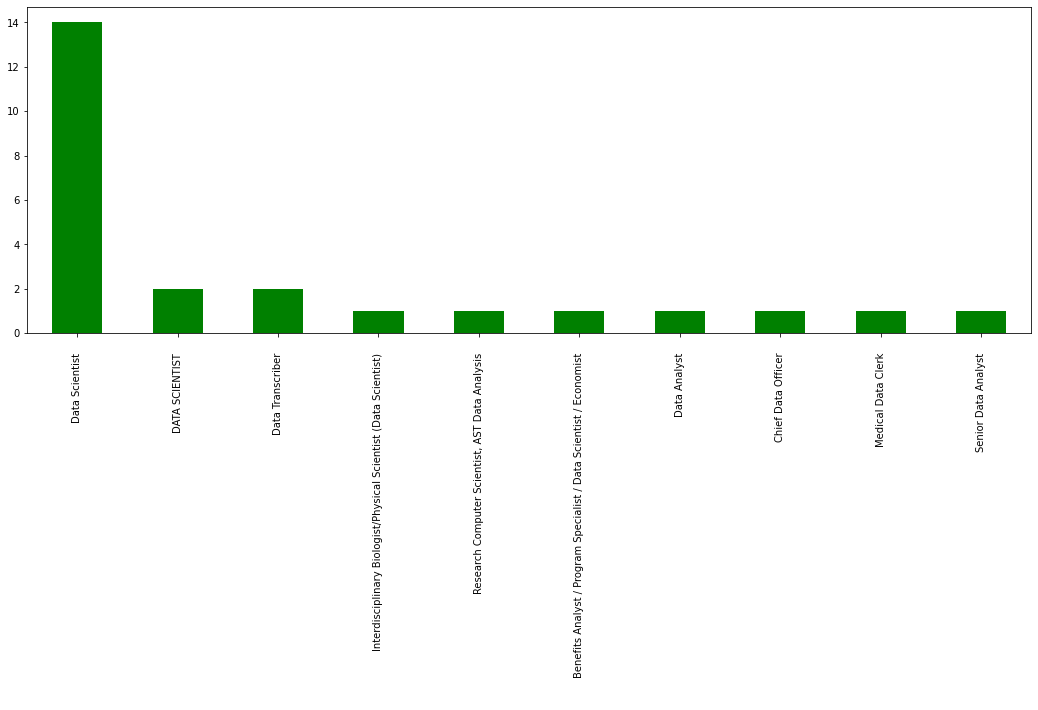

In [15]:
dados['Titulo'].value_counts().plot(kind="bar", figsize=(18,6), color="green")

In [16]:
dados['Localidade'].value_counts()

Washington, District of Columbia                    Washington, District of Columbia    8
Location Negotiable After Selection, United States                                      4
Multiple Locations                                                                      3
Oakland, California                    Oakland, California                              2
Reston, Virginia                    Reston, Virginia                                    2
Anywhere in the U.S. (remote job)                                                       1
Naval Base, Norfolk, Virginia                    Naval Base, Norfolk, Virginia          1
Port Hueneme, California                    Port Hueneme, California                    1
Huntsville, Alabama                    Huntsville, Alabama                              1
Boise, Idaho                    Boise, Idaho                                            1
New London, Connecticut                    New London, Connecticut                      1
Name: Loca

<AxesSubplot:>

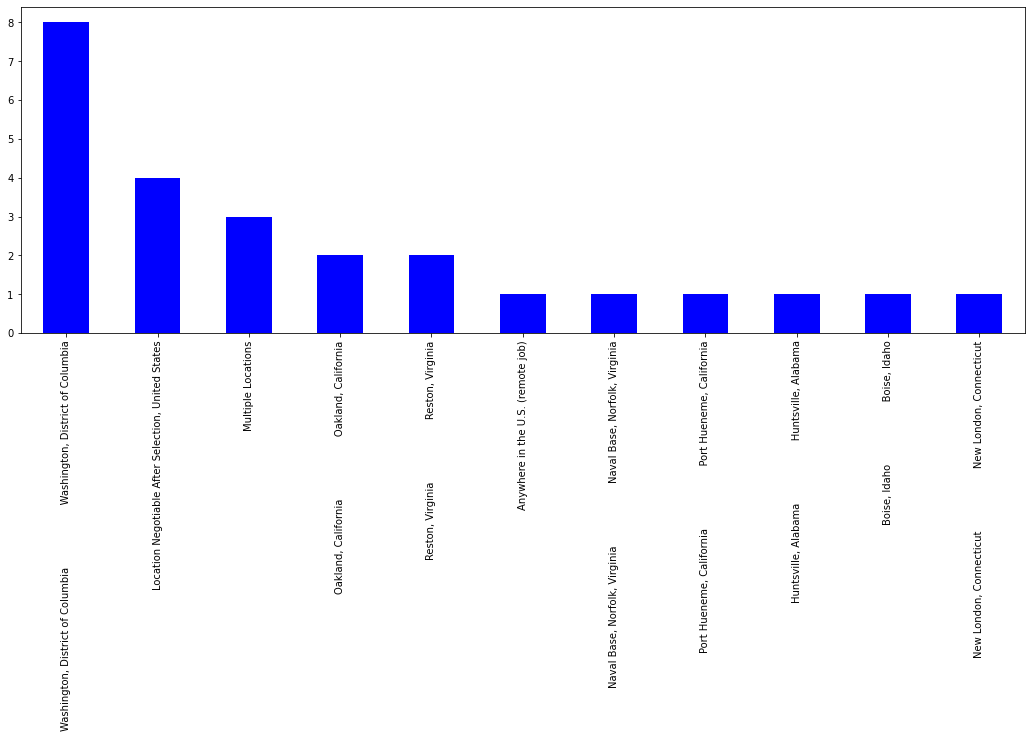

In [17]:
dados['Localidade'].value_counts().plot(kind="bar",figsize=(18,6), color="blue")

In [18]:
dados['Empresa'].value_counts()

Geological Survey                                      3
Veterans Health Administration                         3
Library of Congress                                    2
Department of Energy - Agency Wide                     2
Office of Personnel Management                         2
Office of Disability Employment Policy                 2
Federal Emergency Management Agency                    2
Office of Departmental Equal Employment Opportunity    2
Federal Energy Regulatory Commission                   1
Military Sealift Command                               1
Naval Sea Systems Command                              1
Centers for Disease Control and Prevention             1
George C. Marshall Space Flight Center                 1
Government Accountability Office                       1
Department of Homeland Security - Agency Wide          1
Name: Empresa, dtype: int64

<AxesSubplot:>

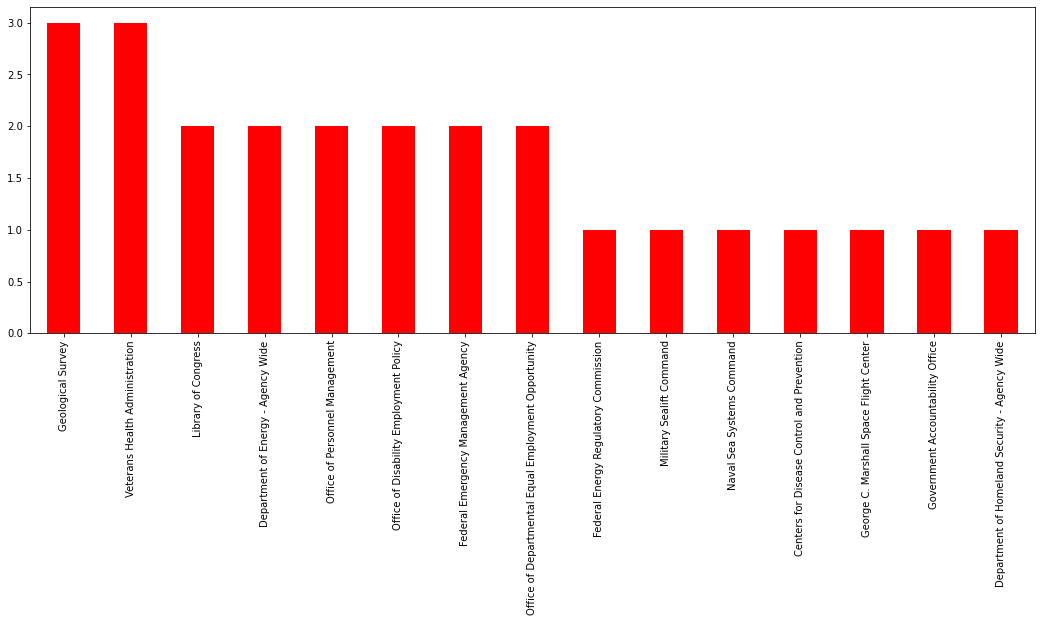

In [19]:
dados['Empresa'].value_counts().plot(kind="bar", figsize=(18,6), color="red")